# MVP: Exploratory Data Analysis Project

## Data science and the stack overflow developers survery
### Goals: Using the stack overflow data answer this question: Where are data scientists working and who are they working for? How career satisfied are Data Scientists?

## Initial Data Cleaning and Eploratory Findings
#### I examined data from the 2017 Stack Overflow developer survey. The data contained responses from over 50,000 Stack Overflow users to questions on an extensive range of topics. Survey respondents included many types of Stack Overflow users such as web developers, mobile app developers, embedded applications developers and data scientists. Since I am interested in the career satisfaction, job placement and location and of data scientists, I started by narrowing the dataset to focus on categories that initally seemed to be related to this question. I got rid of most columns in the dataset (each coloumn corresponds to a question response, each row corresponds to one respondent). There were originally 154 columns, which I narrowed down to 11. Since we are only interested in data scientists, I made a function to grab rows in which the respondent identified as a data scientist. After applying this filter, the data contained 1100 responses.

## Methodology
#### With data cleaning complete, I began summarizing the data by making several histograms and bar charts. As they are directly related to the question of "How career satisfied are data scientists?", I made histograms of the career satisfaction and job satisfaction levels. Next, I sorted the responsdents by country and company type, and constructed a bar chart for each. Finally, I identified some additional questions and topics to explore based on the MVP analysis. 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None  # Turn off warnings

In [3]:
data = pd.read_csv('../data/survey_results_public.csv')

In [4]:
data.shape

(51392, 154)

In [7]:
narrow_data = data[['Professional', 'Country', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
               'CompanySize', 'CompanyType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction']]

In [8]:
narrow_data.shape

(51392, 11)

In [9]:
narrow_data.head()

,Professional,Country,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction
0,Student,United States,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Student,United Kingdom,Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",NaN,NaN,NaN
2,Professional developer,United Kingdom,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,NaN,8.0,9.0
3,Professional non-developer who sometimes write...,United States,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0
4,Professional developer,Switzerland,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",NaN,6.0,8.0


### Narrow down the data to those identifying as a Data Scientist
#### Note: This category contains other such as: Data scientist; educator - need to include these in the data

In [12]:
ds_data = narrow_data[narrow_data['NonDeveloperType'].str.contains('Data scientist', na=False)]

In [13]:
ds_data.head()

,Professional,Country,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction
3,Professional non-developer who sometimes write...,United States,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0
6,Professional non-developer who sometimes write...,United States,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,Government agency or public school/university,Data scientist,7.0,6.0
528,Professional non-developer who sometimes write...,El Salvador,Employed full-time,Some college/university study without earning ...,A business discipline,About half the time,10 to 19 employees,Publicly-traded corporation,Analyst or consultant; Data scientist,10.0,10.0
618,Professional non-developer who sometimes write...,United States,Employed part-time,Some college/university study without earning ...,Something else,It's complicated,"1,000 to 4,999 employees","Privately-held limited company, not in startup...",Analyst or consultant; Data scientist; Designe...,9.0,7.0
658,Professional non-developer who sometimes write...,United States,Employed full-time,Master's degree,A business discipline,A few days each month,"1,000 to 4,999 employees","Privately-held limited company, not in startup...",Analyst or consultant; Data scientist,8.0,9.0


In [14]:
ds_data.shape

(1100, 11)

#### The data are now much smaller - 1100 people identified as "Data Scientist"

### First, we will look at the distribution of the career/job satisfaction data using a histogram

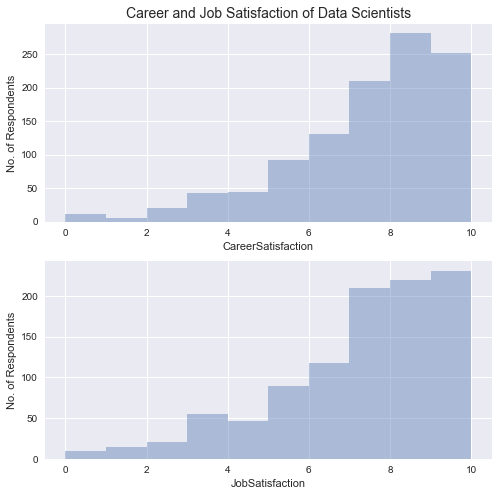

In [65]:
sns.set_color_codes('pastel')
f, (ax1, ax2) = plt.subplots(2, sharex=False, figsize=(8,8))
sns.distplot(ds_data['CareerSatisfaction'].dropna(axis=0), bins=10, kde=False, ax=ax1)
ax1.set_ylabel('No. of Respondents')
ax1.set_title('Career and Job Satisfaction of Data Scientists', fontsize=14)
sns.distplot(ds_data['JobSatisfaction'].dropna(axis=0), bins=10, kde=False, ax=ax2)
ax2.set_ylabel('No. of Respondents')




#### The data are right distributed - indicating that data scientists' career and job satisfaction levels skew toward higher levels of satisfaction

### Now let's take a look at where data scientists are located
#### The data will be limited to those countries with 10 or more data scientists in the survey

In [39]:
countries = ds_data.groupby('Country')['Professional'].count().reset_index()
countries.columns = ['Country', 'Number']


In [40]:
countries.head()

,Country,Number
0,Afghanistan,1
1,Aland Islands,2
2,Algeria,1
3,Angola,1
4,Antarctica,1


In [44]:
top_countries = countries[countries.Number >= 20]
top_countries = top_countries.sort_values(['Number'], axis=0, ascending=False)
top_countries

,Country,Number
94,United States,271
31,Germany,121
93,United Kingdom,92
39,India,52
18,Canada,38
29,France,27
71,Poland,27
45,Italy,23
84,Switzerland,23
6,Australia,21


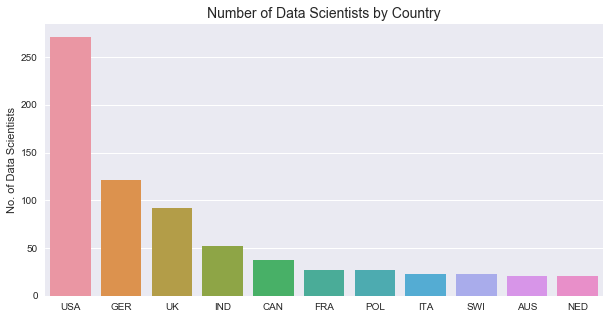

In [50]:
x = ['USA', 'GER', 'UK', 'IND', 'CAN', 'FRA', 'POL', 'ITA', 'SWI', 'AUS', 'NED']
f, ax = plt.subplots(figsize=(10, 5))
sns.set_color_codes('pastel')
sns.barplot(x, y=top_countries['Number'])
ax.set_ylabel('No. of Data Scientists')
ax.set_title('Number of Data Scientists by Country', fontsize=14)


#### The country with the most data scientists appears to be the US, followed by the UK and Germany. 

### Now we will take a look at where data scientists are working (i.e. company types)

In [54]:
companies = ds_data.groupby('CompanyType')['Professional'].count().reset_index()
companies.columns = ['CompanyType', 'Number']
companies.set_index('CompanyType', inplace=True)
companies = companies.sort_values('Number', ascending=False)
companies

,Number
CompanyType,
"Privately-held limited company, not in startup mode",262
Government agency or public school/university,231
Publicly-traded corporation,128
Non-profit/non-governmental organization or private school/university,78
I don't know,54
"Sole proprietorship or partnership, not in startup mode",46
I prefer not to answer,37
Venture-funded startup,34
State-owned company,26


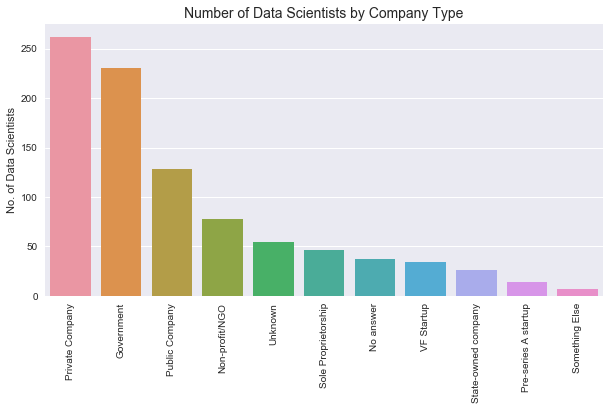

In [62]:
x = ['Private Company', 'Government', 'Public Company', 'Non-profit/NGO', 'Unknown', 'Sole Proprietorship', 'No answer',
            'VF Startup', 'State-owned company', 'Pre-series A startup', 'Something Else']
plt.figure(figsize=(8, 5))
f, ax = plt.subplots(figsize=(10, 5))
ax.set_xticklabels(x, rotation=90)
sns.set_color_codes('pastel')
sns.barplot(x, y=companies['Number'])
ax.set_ylabel('No. of Data Scientists')
ax.set_title('Number of Data Scientists by Company Type', fontsize=14)
plt.show()

#### Data scientists appear to be relatively well distributed across different company types, with the largest categories being private companies and government. There are also relatively large portions of data scientists working in publicly traded corporations and non-profits and NGO's. 

## Initial Research Findings
#### 1. Based on the right skewed histograms for job and career satisfaction, it appears that data scientists are generally satisfied with their careers. 
#### 2. Data scientists are concentrated in the UK, the US and Germany. It would be interesting to see whether this is true across all Stack Overflow respondents or if this is unique to data scientists. 
#### 3. Data scientists are finding work in a wide range of industries. Although privately held companies and government are the largest categories in the pie chart, there are many other sectors that appear to be well represented - notably non-profits/NGO's and public corporations.

### Other questions to explore:
#### 1. How do these data compare to the general group of survey respondents? Are data scientist more or less satisfied with their jobs than other developers in the stack overflow survey? 
#### 2. How does the distribution of countries compare to the generall population of stack over flow users? How do career and job satisfaction vary by region? How do the top countries for data scientists compare to the top countries by population?
#### 3. How many data scientist work remotely compared to in the office? Are those that work remotely more or less satisfied?
#### 4. In which industries are data scientists most/least satisfied? Are these distribution different for data scientists compared to the industry as a whole? Government workers are generally unsatisfied - is this true for data scientists in government? http://fortune.com/2015/12/08/government-workers-satisfaction/
#### 5. Does education level relate to job satisfaction?
#### 6. Does salary affect employee satisfaction?